概要：要想深入了解机器学习模型的实现，或者是涉及图像增强技术，都要有一定的数学功底。这部分本来是别人的学习笔记，
我照着一步步操作学习，自己也做个总结。

1.标量只有大小，如整数；向量有大小也有方向。

python中的向量：

In [1]:
[1,2,3,4]

[1, 2, 3, 4]

其实是个列表。

在numpy中定义向量：

In [4]:
from __future__ import division, print_function, unicode_literals

import numpy as np
video = np.array([10.5, 5.2, 3.25, 7.0])
video

array([10.5 ,  5.2 ,  3.25,  7.  ])

在numpy中叫数组；可以得到向量的大小：

In [6]:
video.size

4

2.图形化向量，我们使用matplotlib绘图。

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

创建两个二维向量：

In [8]:
u = np.array([2, 5])
v = np.array([3, 1])

每个向量有两个元素，可以代表平面中的点：

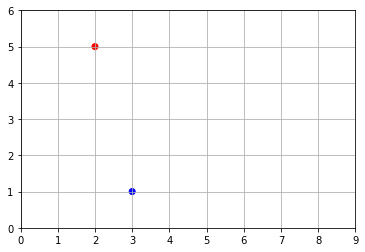

In [9]:
x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

向量也可以用箭头表示：

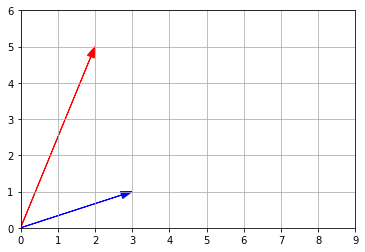

In [10]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

向量的方向是有参照的，如上图所示。

下面看看三维向量。

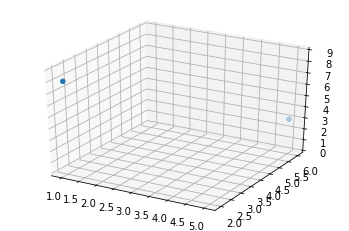

In [11]:
a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

from mpl_toolkits.mplot3d import Axes3D

subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()

不容易看到点的位置，我们来画个参照点：

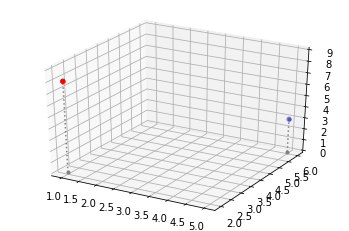

In [12]:
def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0, z], color="gray", linestyle='dotted', marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()

3.向量的距离。

向量的距离是可以度量的，通常用欧氏距离，记做：$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$
就是每个元素的平方后再求和，然后开根号。

具体计算方法如下：

In [14]:
def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5

print("||", u, "|| =")
vector_norm(u)

|| [2 5] || =


5.385164807134504

在numpy中计算很方便：

In [15]:
import numpy.linalg as LA
LA.norm(u)

5.385164807134504

我们绘图展示一下这个距离：

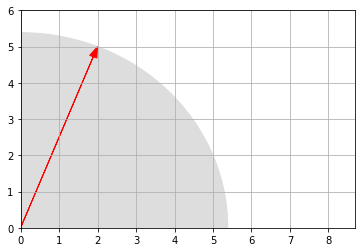

In [16]:
radius = LA.norm(u)
plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))
plot_vector2d(u, color="red")
plt.axis([0, 8.7, 0, 6])
plt.grid()
plt.show()

4.向量的运算。

同样大小的向量可以相加：

In [17]:
print(" ", u)
print("+", v)
print("-"*10)
u + v

  [2 5]
+ [3 1]
----------


array([5, 6])

我们把向量相加图形化：

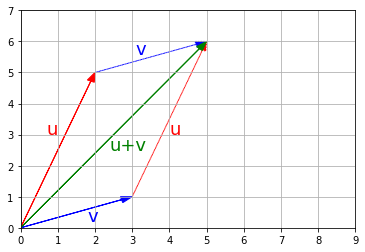

In [20]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()

向量相加是可交换的，就是 u + v = v + u。

向量相加是相关联的的，就是 (u + v) + t = u + (v + t)。

向量的每个点都增加同一个向量值，称之为向量的移动：

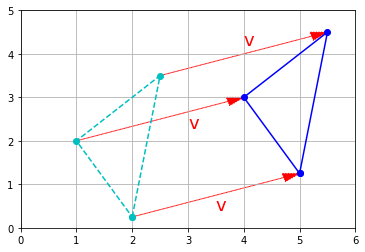

In [21]:
t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])

x_coords, y_coords = zip(t1, t2, t3, t1)
plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(v, t1, color="r", linestyle=":")
plot_vector2d(v, t2, color="r", linestyle=":")
plot_vector2d(v, t3, color="r", linestyle=":")

t1b = t1 + v
t2b = t2 + v
t3b = t3 + v

x_coords_b, y_coords_b = zip(t1b, t2b, t3b, t1b)
plt.plot(x_coords_b, y_coords_b, "b-", x_coords_b, y_coords_b, "bo")

plt.text(4, 4.2, "v", color="r", fontsize=18)
plt.text(3, 2.3, "v", color="r", fontsize=18)
plt.text(3.5, 0.4, "v", color="r", fontsize=18)

plt.axis([0, 6, 0, 5])
plt.grid()
plt.show()

移动的向量是：

In [22]:
v

array([3, 1])

向量乘以标量：

In [23]:
print("1.5 *", u, "=")

1.5 * u

1.5 * [2 5] =


array([3. , 7.5])

向量乘以标量的图形化：

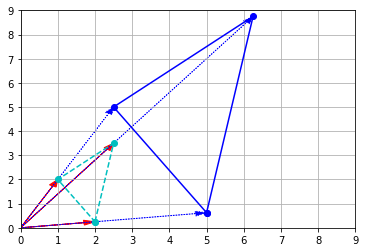

In [24]:
k = 2.5
t1c = k * t1
t2c = k * t2
t3c = k * t3

plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(t1, color="r")
plot_vector2d(t2, color="r")
plot_vector2d(t3, color="r")

x_coords_c, y_coords_c = zip(t1c, t2c, t3c, t1c)
plt.plot(x_coords_c, y_coords_c, "b-", x_coords_c, y_coords_c, "bo")

plot_vector2d(k * t1, color="b", linestyle=":")
plot_vector2d(k * t2, color="b", linestyle=":")
plot_vector2d(k * t3, color="b", linestyle=":")

plt.axis([0, 9, 0, 9])
plt.grid()
plt.show()

向量除以标量，等同于乘以标量的倒数：$\dfrac{\textbf{u}}{\lambda} = \dfrac{1}{\lambda} \times \textbf{u}$

向量乘法是可交换的: $\lambda \times \textbf{u} = \textbf{u} \times \lambda$.

向量乘法是相关联的：$\lambda_1 \times (\lambda_2 \times \textbf{u}) = (\lambda_1 \times \lambda_2) \times \textbf{u}$.

向量乘法是可分布的：$\lambda \times (\textbf{u} + \textbf{v}) = \lambda \times \textbf{u} + \lambda \times \textbf{v}$.

5.归一化向量。

unit 向量指的是经过规范化后值为1。

归一化向量指，向量u的unit 值并且该值和u的方向一致：$\hat{\textbf{u}} = \dfrac{\textbf{u}}{\left \Vert \textbf{u} \right \|}$

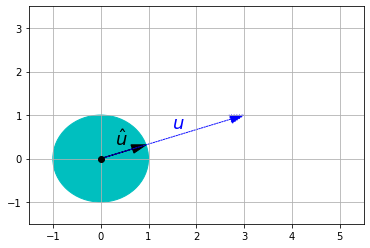

In [27]:
plt.gca().add_artist(plt.Circle((0,0),1,color='c'))
plt.plot(0, 0, "ko")
plot_vector2d(v / LA.norm(v), color="k")
plot_vector2d(v, color="b", linestyle=":")
plt.text(0.3, 0.3, "$\hat{u}$", color="k", fontsize=18)
plt.text(1.5, 0.7, "$u$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.grid()
plt.show()

6.向量的点积。

向量的点积也叫标量积或者内积，定义为：
$\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$

 $\theta$ 是u和v之间的角度。

另一个计算内积方法是：$\textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$

在python中计算点积：

In [28]:
def dot_product(v1, v2):
    return sum(v1i * v2i for v1i, v2i in zip(v1, v2))

dot_product([1,2], [3,4])

11

numpy也可以计算：

In [29]:
np.dot(u,v)

11

或者这样：

In [30]:
u.dot(v)

11

注意，*是向量乘法，但不是点积。

In [31]:
print("  ",u)
print("* ",v, "(NOT a dot product)")
print("-"*10)

u * v

   [2 5]
*  [3 1] (NOT a dot product)
----------


array([6, 5])

点积运算的属性：

* 点积运算是可交换的：$\textbf{u} \cdot \textbf{v} = \textbf{v} \cdot \textbf{u}$.

* 点积只能在向量之间运算；标量和向量之间不行。

* 点积运算不是相关联的：$(\textbf{u} \cdot \textbf{v}) \cdot \textbf{w} ≠ \textbf{u} \cdot (\textbf{v} \cdot \textbf{w})$

* 点积运算和标量加法是相关联的： $\textbf{u} \cdot (\textbf{v} + \textbf{w}) = \textbf{u} \cdot \textbf{v} + \textbf{u} \cdot \textbf{w}$.

* 点积运算和标量乘法是相关联的：$\lambda \times (\textbf{u} \cdot \textbf{v}) = (\lambda \times \textbf{u}) \cdot \textbf{v} = \textbf{u} \cdot (\lambda \times \textbf{v})$